In [1]:
freq=[0,0,0,0,0,0,0,0,0,0,0]
years=[1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]
with open ('Datasets/cit-HepPh-dates.txt','r') as f:
    lines=f.readlines()

count=0
paperDate={}
for line in lines:
    if(count==0):
        count+=1
        continue
    else:
        linespl=line.strip().split()
        freq[int(linespl[1].split('-')[0])-1992]+=1
        if(linespl[0][0:2]!='11'):
            paperDate[int(linespl[0])]=int(linespl[1].split('-')[0])-1992
        else:
            paperDate[int(linespl[0][2:])]=int(linespl[1].split('-')[0])-1992
# print(paperDate)


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Gr = nx.DiGraph()
Gr1 = nx.DiGraph()
Gr2 = nx.DiGraph()
with open('Datasets/1992to1995.txt', 'r') as f:
    lines = f.readlines()
with open('Datasets/1992to1996.txt', 'r') as f:
    lines1 = f.readlines()
with open('Datasets/cit-HepPh.txt', 'r') as f:
    lines2 = f.readlines()
edges = []
count = 0

for line in lines:
    if count < 4:
        count += 1
    else:
        linesp = line.strip().split()
        edges.append((int(linesp[0]), int(linesp[1])))
        count+=1

Gr.add_edges_from(edges)
edges = []
count = 0

for line in lines1:
    if count < 4:
        count += 1
    else:
        linesp = line.strip().split()
        edges.append((int(linesp[0]), int(linesp[1])))
        count+=1
Gr1.add_edges_from(edges)
edges = []
count = 0

for line in lines2:
    if count < 4:
        count += 1
    else:
        linesp = line.strip().split()
        edges.append((int(linesp[0]), int(linesp[1])))
        count+=1
Gr2.add_edges_from(edges)
# labels=nx.clustering(Gr)
# labels1=nx.clustering(Gr1)
# labels2=nx.clustering(Gr2)\
labels=[]
labels1=[]
labels2=[]
for i in Gr.nodes:
    if(int(i) in paperDate.keys()):
        labels.append(paperDate[int(i)])
    else:
        labels.append(0)
for i in Gr1.nodes:
    if(int(i) in paperDate.keys()):
        labels1.append(paperDate[int(i)])
    else:
        labels1.append(0)
for i in Gr2.nodes: 
    if(int(i) in paperDate.keys()):
        labels2.append(paperDate[int(i)])
    else:
        labels2.append(0)
print(labels)
print(labels1)
print(labels2)

[3, 1, 3, 0, 0, 0, 0, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 1, 1, 1, 0, 9, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 2, 2, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 3, 3, 3, 1, 0, 1, 1, 2, 3, 6, 6, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 2, 0, 1, 3, 0, 1, 2, 2, 3, 1, 0, 3, 0, 1, 1, 2, 2, 2, 2, 3, 3, 0, 1, 1, 1, 2, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 1, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [3]:
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import torch
import torch.optim as optim

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [4]:
class GNNStack(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, task='node'):
        super(GNNStack, self).__init__()
        self.task = task
        self.convs = nn.ModuleList()
        self.convs.append(pyg_nn.GCNConv(input_dim,hidden_dim))
        self.layerns = nn.ModuleList()
        for i in range(5):
            self.layerns.append(nn.LayerNorm(hidden_dim))
        for l in range(5):
            self.convs.append(pyg_nn.GCNConv(hidden_dim, hidden_dim))
        self.num_layers = 6 

    def forward(self, data):
        # print(data)
        x, edge_index= data.x, data.edge_index
        x = torch.ones(data.num_nodes, 1)

        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            emb = x
            x = F.relu(x)
            x = F.dropout(x, training=self.training)
            if not i == self.num_layers - 1:
                x = self.layerns[i](x)

        return emb, F.log_softmax(x, dim=1)

    def loss(self, pred, label):
        return F.nll_loss(pred, label)

In [5]:
def train(dataset, task):
    loader = dataset
    model = GNNStack(1, 32, 7, task=task)   # input dim should be set to 1
    opt = optim.Adam(model.parameters(), lr=0.01)
    
    for epoch in range(300):
        total_loss = 0
        model.train()
        # count=0
        for batch in loader:
            opt.zero_grad()
            embedding, pred = model(batch)
            label = batch.y
            pred = pred[batch.train_mask]
            label = label[batch.train_mask]
            loss = model.loss(pred, label)   
            loss.backward()
            opt.step()
            total_loss += loss.item()
        total_loss /= len(loader)

        if epoch % 10 == 0:
            model.eval()
            correct = 0
            for data in loader:
                with torch.no_grad():
                    emb, pred = model(data)
                    pred = pred.argmax(dim=1)
                    label = data.y
                mask = data.val_mask if False else data.test_mask
                pred = pred[mask]
                label = data.y[mask]
                correct += pred.eq(label).sum().item()
            
            total = 0
            for data in loader:
                    total += torch.sum(data.test_mask).item()
            print("Epoch {}. Loss: {:.4f}.".format(
                epoch, total_loss))
            
    return model


In [6]:
task = 'node'
pyGraph=pyg_utils.convert.from_networkx(Gr)
pyGraph.x=torch.ones(pyGraph.num_nodes,1)
labs=[]
# for j in Gr.nodes:
#     labs.append(labels[j])
# print(labs)
pyGraph.y=torch.tensor(labels)
import random
train_mask = [False for _ in range(pyGraph.num_nodes)]
test_mask = [not x for x in train_mask]
pyGraph.train_mask = torch.tensor(train_mask)
pyGraph.test_mask = torch.tensor(test_mask)
# pyGraph.val_mas/k = torch.tensor(test_mask)
# print(pyGraph.y)
for i in range(pyGraph.num_nodes):
    pyGraph.y[i]=int(pyGraph.y[i])
pyGraph.y=pyGraph.y.type(torch.LongTensor)
# -----------------------------------------------------------------
pyGraph1=pyg_utils.convert.from_networkx(Gr1)
pyGraph1.x=torch.ones(pyGraph1.num_nodes,1)
labs=[]
# for j in Gr1.nodes:
#     labs.append(labels1[j])
# print(labs)
pyGraph1.y=torch.tensor(labels1)
import random
train_mask = [random.random() > 0.6 for _ in range(pyGraph1.num_nodes)]
test_mask = [not x for x in train_mask]
pyGraph1.train_mask = torch.tensor(train_mask)
pyGraph1.test_mask = torch.tensor(test_mask)
# pyGraph.val_mas/k = torch.tensor(test_mask)
# print(pyGraph1.y)
for i in range(pyGraph1.num_nodes):
    pyGraph1.y[i]=int(pyGraph1.y[i])
pyGraph1.y=pyGraph1.y.type(torch.LongTensor)
# -----------------------------------------------------------------
pyGraph2=pyg_utils.convert.from_networkx(Gr2)
pyGraph2.x=torch.ones(pyGraph2.num_nodes,1)
labs=[]
# for j in Gr2.nodes:
#     labs.append(labels2[j])
# print(labs)
pyGraph2.y=torch.tensor(labels2)
import random
train_mask = [random.random() > 0.0001 for _ in range(pyGraph2.num_nodes)]
test_mask = [not x for x in train_mask]
pyGraph2.train_mask = torch.tensor(train_mask)
pyGraph2.test_mask = torch.tensor(test_mask)
for i in range(pyGraph2.num_nodes):
    pyGraph2.y[i]=int(pyGraph2.y[i])
pyGraph2.y=pyGraph2.y.type(torch.LongTensor)
dataset=[]
# dataset.append(pyGraph)
# dataset.append(pyGraph1)
dataset.append(pyGraph2)
model = train(dataset, task)

Epoch 0. Loss: 3.9663. Accuracy:0.0000. 
Epoch 10. Loss: 3.3324. Accuracy:0.0000. 
Epoch 20. Loss: 3.2286. Accuracy:0.0000. 
Epoch 30. Loss: 3.1945. Accuracy:0.0000. 
Epoch 40. Loss: 3.1751. Accuracy:0.0000. 
Epoch 50. Loss: 3.1671. Accuracy:0.0000. 
Epoch 60. Loss: 3.1539. Accuracy:0.3333. 
Epoch 70. Loss: 3.1516. Accuracy:0.0000. 
Epoch 80. Loss: 3.1419. Accuracy:0.0000. 
Epoch 90. Loss: 3.1459. Accuracy:0.0000. 
Epoch 100. Loss: 3.1408. Accuracy:0.0000. 
Epoch 110. Loss: 3.1302. Accuracy:0.0000. 
Epoch 120. Loss: 3.1224. Accuracy:0.0000. 
Epoch 130. Loss: 3.1329. Accuracy:0.0000. 
Epoch 140. Loss: 3.1302. Accuracy:0.0000. 
Epoch 150. Loss: 3.1269. Accuracy:0.0000. 
Epoch 160. Loss: 3.1238. Accuracy:0.3333. 
Epoch 170. Loss: 3.1209. Accuracy:0.6667. 
Epoch 180. Loss: 3.1199. Accuracy:0.6667. 
Epoch 190. Loss: 3.1193. Accuracy:0.3333. 
Epoch 200. Loss: 3.1118. Accuracy:0.3333. 
Epoch 210. Loss: 3.1210. Accuracy:0.0000. 
Epoch 220. Loss: 3.1099. Accuracy:0.0000. 
Epoch 230. Loss: 3.110

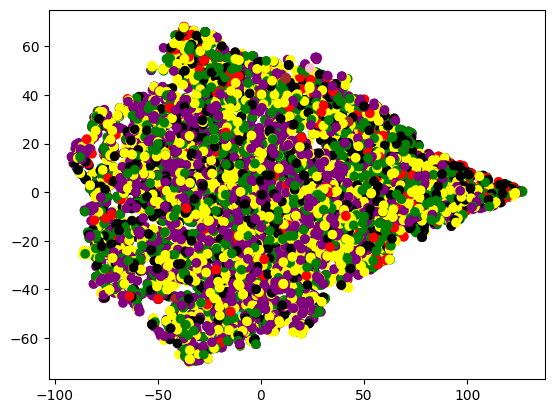

In [7]:
color_list = ["red", "black", "green", "yellow", "purple", "brown", "pink", "gray", "olive", "cyan","orange"]

num_colors = len(color_list)
color_step = 32 / num_colors
dataset.append(pyGraph1)
loader = dataset
embs = []
colors = []

# for batch in loader:.
emb, pred = model(loader[1])
embs.append(emb)
# normalized_y = torch.clamp(loader[2].y, 0, 32)
colors += [color_list[y] for y in loader[1].y]

embs = torch.cat(embs, dim=1)

xs, ys = zip(*TSNE().fit_transform(embs.detach().numpy()))
plt.scatter(xs, ys, color=colors)
plt.show()